# Training History Visualization
Visualizing the training metrics from the weighted CNN model training.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12

In [2]:
# Load training history
with open('pipelines/weighted_training_history.txt', 'r') as f:
    history = json.load(f)

print("Loaded training history!")
print(f"Epochs trained: {len(history['train_loss'])}")

Loaded training history!
Epochs trained: 10


## 1. Loss Curves

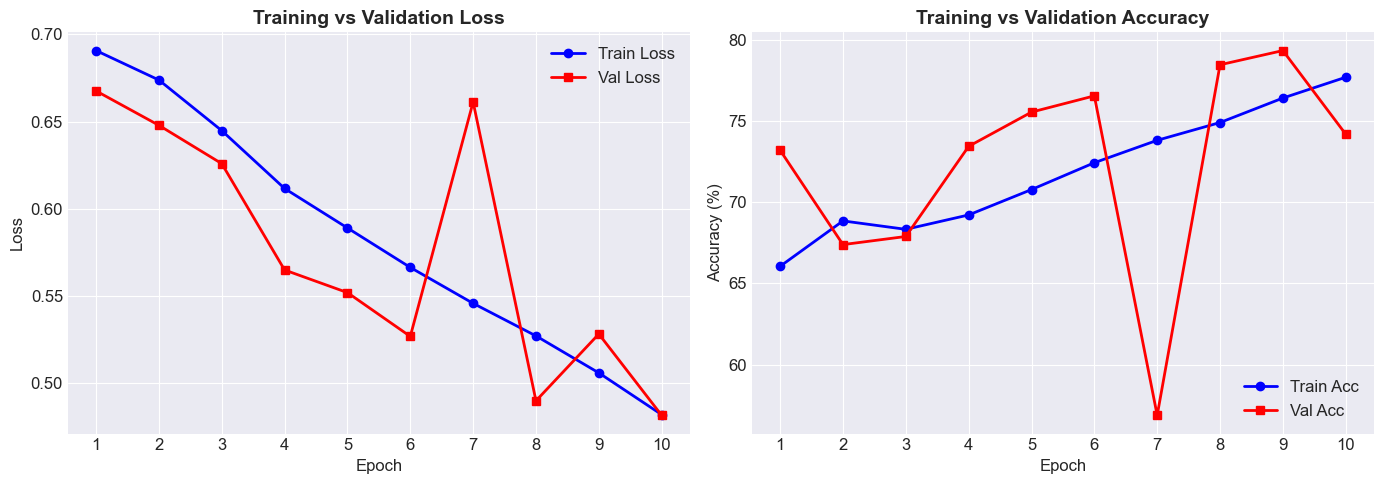

In [3]:
epochs = range(1, len(history['train_loss']) + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss Plot
axes[0].plot(epochs, history['train_loss'], 'b-o', label='Train Loss', linewidth=2, markersize=6)
axes[0].plot(epochs, history['val_loss'], 'r-s', label='Val Loss', linewidth=2, markersize=6)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper right')
axes[0].set_xticks(epochs)

# Accuracy Plot
axes[1].plot(epochs, history['train_acc'], 'b-o', label='Train Acc', linewidth=2, markersize=6)
axes[1].plot(epochs, history['val_acc'], 'r-s', label='Val Acc', linewidth=2, markersize=6)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].set_xticks(epochs)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

## 2. Confusion Matrix

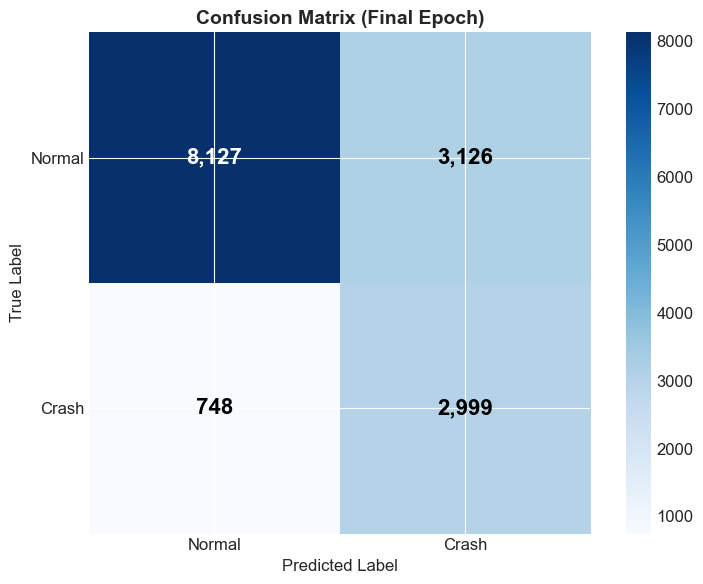

In [4]:
cm = history['confusion_matrix']

# Create confusion matrix array
cm_array = np.array([[cm['TN'], cm['FP']], 
                     [cm['FN'], cm['TP']]])

fig, ax = plt.subplots(figsize=(8, 6))

# Plot heatmap
im = ax.imshow(cm_array, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels
labels = ['Normal', 'Crash']
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix (Final Epoch)', fontsize=14, fontweight='bold')

# Add text annotations
for i in range(2):
    for j in range(2):
        text_color = 'white' if cm_array[i, j] > cm_array.max()/2 else 'black'
        ax.text(j, i, f'{cm_array[i, j]:,}', 
                ha='center', va='center', color=text_color, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Performance Metrics

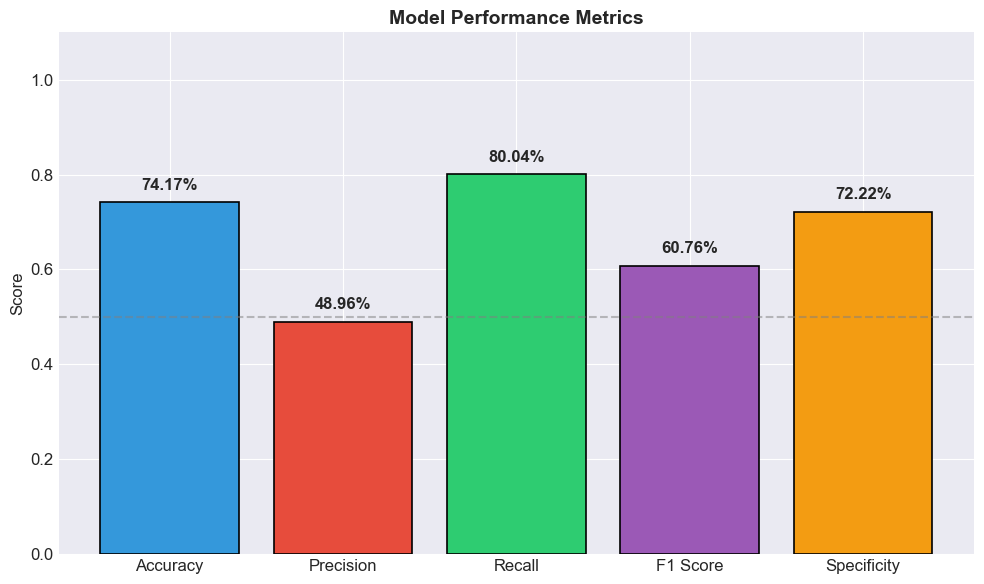


FINAL MODEL PERFORMANCE SUMMARY
Accuracy       : 0.7417 (74.17%)
Precision      : 0.4896 (48.96%)
Recall         : 0.8004 (80.04%)
F1 Score       : 0.6076 (60.76%)
Specificity    : 0.7222 (72.22%)


In [5]:
# Calculate metrics
TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Specificity': specificity
}

# Plot metrics
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12']
bars = ax.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, val in zip(bars, metrics.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{val:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Baseline (0.5)')

plt.tight_layout()
plt.savefig('performance_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary
print("\n" + "="*50)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*50)
for name, value in metrics.items():
    print(f"{name:15}: {value:.4f} ({value:.2%})")
print("="*50)

## 4. Training Progress Overview

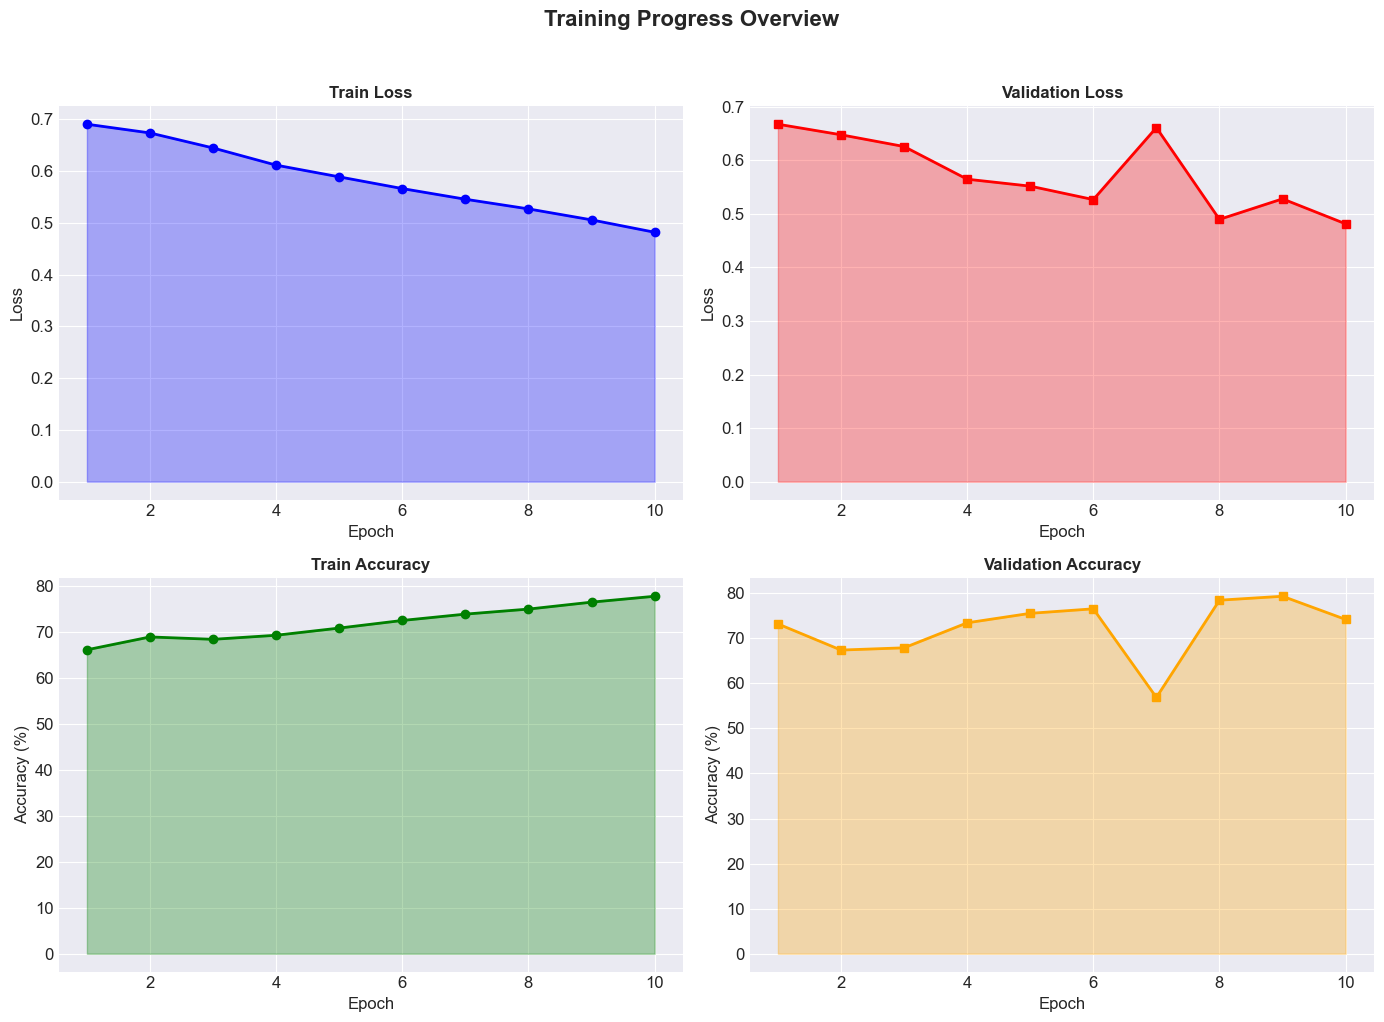

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Train Loss
axes[0, 0].fill_between(epochs, history['train_loss'], alpha=0.3, color='blue')
axes[0, 0].plot(epochs, history['train_loss'], 'b-o', linewidth=2)
axes[0, 0].set_title('Train Loss', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')

# Val Loss
axes[0, 1].fill_between(epochs, history['val_loss'], alpha=0.3, color='red')
axes[0, 1].plot(epochs, history['val_loss'], 'r-s', linewidth=2)
axes[0, 1].set_title('Validation Loss', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')

# Train Accuracy
axes[1, 0].fill_between(epochs, history['train_acc'], alpha=0.3, color='green')
axes[1, 0].plot(epochs, history['train_acc'], 'g-o', linewidth=2)
axes[1, 0].set_title('Train Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy (%)')

# Val Accuracy
axes[1, 1].fill_between(epochs, history['val_acc'], alpha=0.3, color='orange')
axes[1, 1].plot(epochs, history['val_acc'], color='orange', marker='s', linewidth=2)
axes[1, 1].set_title('Validation Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy (%)')

plt.suptitle('Training Progress Overview', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('training_overview.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Key Observations

In [7]:
print("\n" + "="*60)
print("KEY OBSERVATIONS")
print("="*60)

# Best epoch
best_val_epoch = np.argmax(history['val_acc']) + 1
best_val_acc = max(history['val_acc'])
print(f"\nBest Validation Accuracy: {best_val_acc:.2f}% (Epoch {best_val_epoch})")

# Final metrics
print(f"\nFinal Epoch Metrics:")
print(f"  - Train Loss: {history['train_loss'][-1]:.4f}")
print(f"  - Val Loss:   {history['val_loss'][-1]:.4f}")
print(f"  - Train Acc:  {history['train_acc'][-1]:.2f}%")
print(f"  - Val Acc:    {history['val_acc'][-1]:.2f}%")

# Overfitting check
train_val_gap = history['train_acc'][-1] - history['val_acc'][-1]
print(f"\nOverfitting Analysis:")
print(f"  - Train-Val Accuracy Gap: {train_val_gap:.2f}%")
if train_val_gap < 5:
    print("  - Status: Minimal overfitting (Good!)")
elif train_val_gap < 10:
    print("  - Status: Slight overfitting (Monitor it)")
else:
    print("  - Status: Significant overfitting (Consider regularization)")

# FP Analysis
print(f"\nFalse Positive Analysis:")
print(f"  - FP Count: {cm['FP']:,}")
print(f"  - FP Rate: {cm['FP']/(cm['TN']+cm['FP']):.2%}")
print(f"  - Recommendation: Consider Focal Loss or threshold tuning to reduce FP")

print("\n" + "="*60)


KEY OBSERVATIONS

Best Validation Accuracy: 79.32% (Epoch 9)

Final Epoch Metrics:
  - Train Loss: 0.4820
  - Val Loss:   0.4815
  - Train Acc:  77.68%
  - Val Acc:    74.17%

Overfitting Analysis:
  - Train-Val Accuracy Gap: 3.50%
  - Status: Minimal overfitting (Good!)

False Positive Analysis:
  - FP Count: 3,126
  - FP Rate: 27.78%
  - Recommendation: Consider Focal Loss or threshold tuning to reduce FP



In [9]:
frames=[i for i in range(50)]
arrr=[]
for i in range(2):
    for j in range(i*25,i*25+18):
        arrr.append(frames[j:j+5])

print(arrr)
print(len(arrr))
    

[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9], [6, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 12], [9, 10, 11, 12, 13], [10, 11, 12, 13, 14], [11, 12, 13, 14, 15], [12, 13, 14, 15, 16], [13, 14, 15, 16, 17], [14, 15, 16, 17, 18], [15, 16, 17, 18, 19], [16, 17, 18, 19, 20], [17, 18, 19, 20, 21], [25, 26, 27, 28, 29], [26, 27, 28, 29, 30], [27, 28, 29, 30, 31], [28, 29, 30, 31, 32], [29, 30, 31, 32, 33], [30, 31, 32, 33, 34], [31, 32, 33, 34, 35], [32, 33, 34, 35, 36], [33, 34, 35, 36, 37], [34, 35, 36, 37, 38], [35, 36, 37, 38, 39], [36, 37, 38, 39, 40], [37, 38, 39, 40, 41], [38, 39, 40, 41, 42], [39, 40, 41, 42, 43], [40, 41, 42, 43, 44], [41, 42, 43, 44, 45], [42, 43, 44, 45, 46]]
36
